Лабораторна робота №1


Завдання №1
Побудувати рекурентну нейронну мережу для прогнозування слів.
Підібрати архітектуру моделі, кількість  і тип рекурентних шарів, гіперпараметри моделі.
Побудувати графіки функції втрат і точності.
Також доцільно використати Керас тюнер для підбору параметрів.


In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner

from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import RandomSearch

In [ ]:
# Текст
texts = """
Цей Асистент учителя був такий блідий, у зношеному сюртуку,
із зношеним серцем, тілом і мозком; отаким він і постає у моїй пам’яті.
Він весь час витирав пил зі старих словників і збірок граматики своєю чудернацькою хусточкою,
що була мов на сміх прикрашена строкатими прапорами всіх країн світу.
Він любив витирати пил зі старих підручників;
це заняття нагадувало йому про те,
що він смертний.

"""

texts = texts.replace('\ufeff', '')  # Прибираємо перший невидимий символ

maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&;()*+,-./:<=>?@[\\]^_`{|}~\t\n\r«»',
                      lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts([texts])

dist = list(tokenizer.word_counts.items())
print(dist[:10])

data = tokenizer.texts_to_sequences([texts])
res = to_categorical(data[0], num_classes=maxWordsCount)
print(res.shape)

inp_words = 3
n = res.shape[0] - inp_words

X = np.array([res[i:i + inp_words, :] for i in range(n)])
Y = res[inp_words:]

model = Sequential()
model.add(Input((inp_words, maxWordsCount)))
model.add(SimpleRNN(128, activation='tanh', return_sequences=True)) #Простий RNN-шар
model.add(LSTM(128, activation='tanh')) #LSTM-шар
model.add(Dropout(0.2)) #Регуляризація Droput
model.add(Dense(128, activation='relu')) #Dense-шар
model.add(Dense(maxWordsCount, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X, Y, batch_size=32, epochs=50)


def buildPhrase(texts, str_len=20):
    res = texts
    data = tokenizer.texts_to_sequences([texts])[0]
    for i in range(str_len):
        x = to_categorical(data[i: i + inp_words], num_classes=maxWordsCount)
        inp = x.reshape(1, inp_words, maxWordsCount)

        pred = model.predict(inp)
        indx = pred.argmax(axis=1)[0]
        data.append(indx)

        res += " " + tokenizer.index_word[indx]

    return res


res = buildPhrase("Він весь час витирав")
print(res)



[('цей', 1), ('асистент', 1), ('учителя', 1), ('був', 1), ('такий', 1), ('блідий', 1), ('у', 2), ('зношеному', 1), ('сюртуку', 1), ('із', 1)]
(63, 1000)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 3, 128)              │         144,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,608 (1.61 MB)

 Trainable params: 421,608 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.0000e+00 - loss: 6.9084
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0875 - loss: 6.8974
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2826 - loss: 6.8869
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2944 - loss: 6.8731 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3368 - loss: 6.8563
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3250 - loss: 6.8325 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3146 - loss: 6.8010
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1951 - loss: 6.7488
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1417 - loss: 6.6720 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1514 - loss: 6.5219
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0979 - loss: 6.2684
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1187 - loss: 5

Text(0.5, 1.0, 'Графік функції точністі')

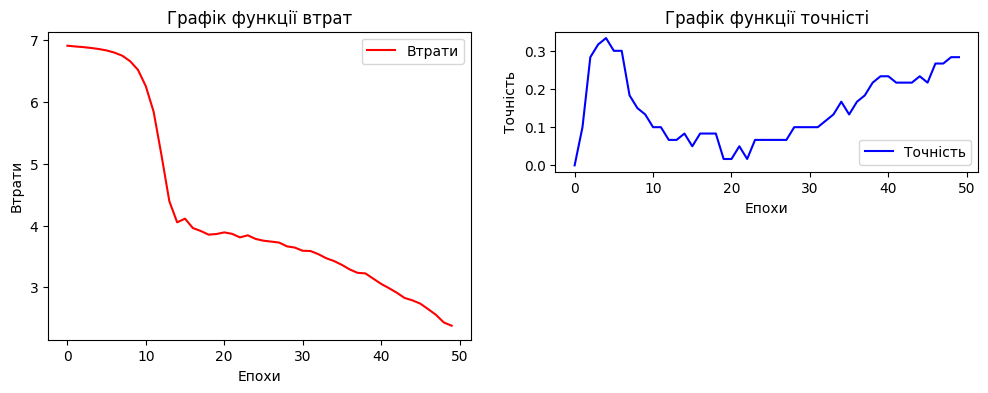

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати', color='red')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графік функції втрат')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Точність', color='blue')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.title('Графік функції точністі')


# Висновок
Було проведено роботу з побудовою рекурентної нейронної мережі для прогнозування слів. Проведено дослідження різних видів архітектур та рекурентних шарів, через які було виявлено, що велика кількість використаних шарів негативно впливає на точність мережі, а шар SimpleRNN є одним з найкращих для невеликих обсягів інформації.